In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
mnist_raw = loadmat("mnist-original.mat")
mnist = {
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

x,y = mnist["data"],mnist["target"]
#shuffle data
shuffle = np.random.permutation(70000)
x,y = x[shuffle],y[shuffle]
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [3]:
model = MLPClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  96.52


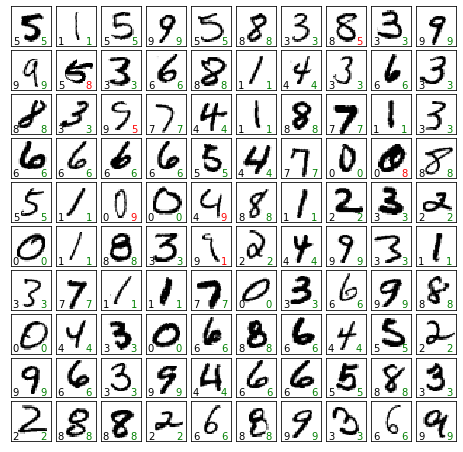

In [4]:
fig,ax = plt.subplots(10,10,
figsize=(8,8),
subplot_kw={"xticks":[],"yticks":[]},
gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28,28),cmap="binary",interpolation="nearest")
    axi.text(0.05,0.05,str(int(y_test[i])),transform=axi.transAxes,color="black")
    axi.text(0.75,0.05,str(int(y_pred[i])),transform=axi.transAxes,color="green" if y_pred[i] == y_test[i] else "red")
plt.show()